# Import important libraries

In [6]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [7]:
df=pd.read_csv("/drive/train.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Data

In [9]:
df.shape

(891, 12)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing values

In [13]:
# Check missing values
print("Missing values")
for col in df.columns:
    m_values=df[col].isna().sum()
    percentage=(m_values/df.shape[0])*100
    print("%s: %.2f%% (%d)" % (col,percentage,m_values))

Missing values
PassengerId: 0.00% (0)
Survived: 0.00% (0)
Pclass: 0.00% (0)
Name: 0.00% (0)
Sex: 0.00% (0)
Age: 19.87% (177)
SibSp: 0.00% (0)
Parch: 0.00% (0)
Ticket: 0.00% (0)
Fare: 0.00% (0)
Cabin: 77.10% (687)
Embarked: 0.22% (2)


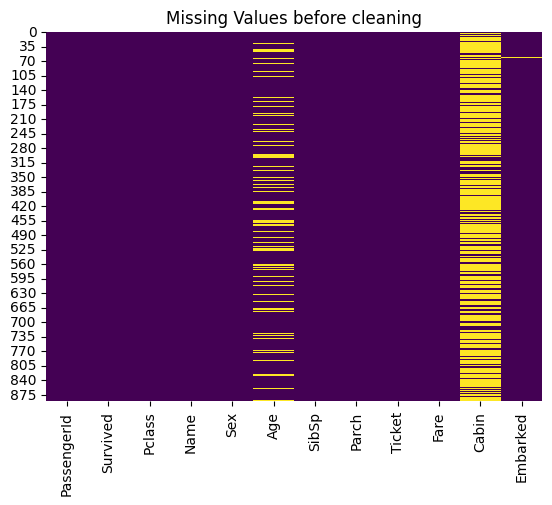

In [14]:
# (Missing Values Visualization)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values before cleaning')
plt.show()

## Check duplicates

In [15]:

df.duplicated().sum()

np.int64(0)

# Clean Data

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cabin column

In [17]:
df.drop(columns="Cabin",inplace=True)

**The Cabin feature has ~77% missing data, making it a strong candidate for removal due to insufficient information.**

## Age column

In [18]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

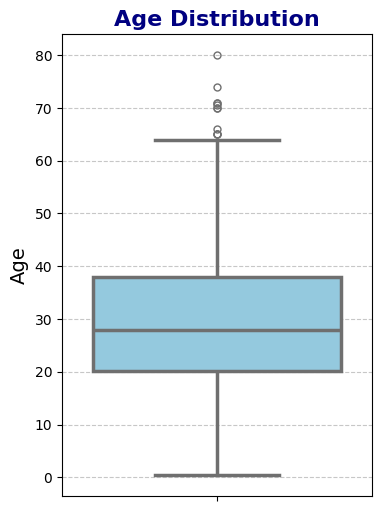

In [19]:

plt.figure(figsize=(4,6))
sns.boxplot(
    y=df['Age'],
    color='skyblue',  
    linewidth=2.5,   
    fliersize=5 
)

plt.title('Age Distribution', fontsize=16, fontweight='bold', color='navy') 
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


**Due to the presence of outliers in the Age feature, the missing values were imputed using the median to minimize the influence of extreme values.** 

In [20]:
## fill missing values
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


In [21]:
df['Age'].isna().sum()

np.int64(0)

## Embarked column

In [22]:

embarked_pclass_group = df.groupby('Pclass')['Embarked'].value_counts()
print(embarked_pclass_group)


Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64


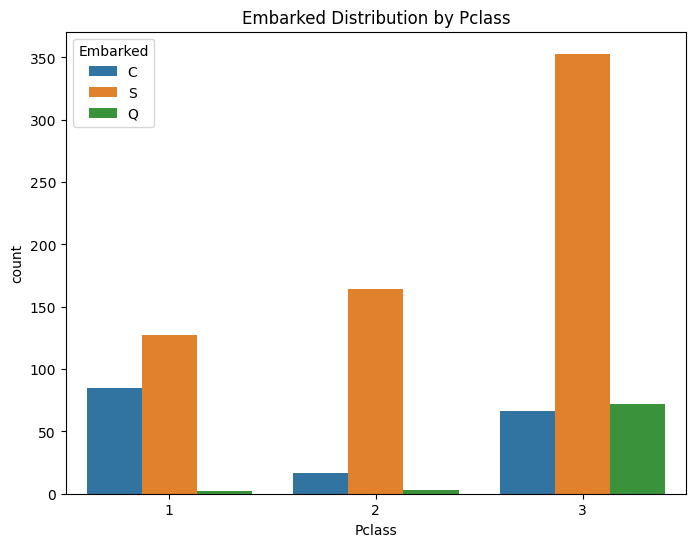

In [23]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Embarked', data=df)
plt.title('Embarked Distribution by Pclass')
plt.show()


In [24]:
# Fill Embarked Based on Pclass
def fill(row):
    if pd.isnull(row['Embarked']):
        if row['Pclass'] == 1:
            return 'S' 
        elif row['Pclass'] == 2:
            return 'S'  
        elif row['Pclass'] == 3:
            return 'S'  
    else:
        return row['Embarked']

df['Embarked'] = df.apply(fill, axis=1)
print(df['Embarked'].isnull().sum())


0


**Missing Embarked values were filled based on **Pclass** for a more logical filling.**

## Missing values after cleaning

In [25]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

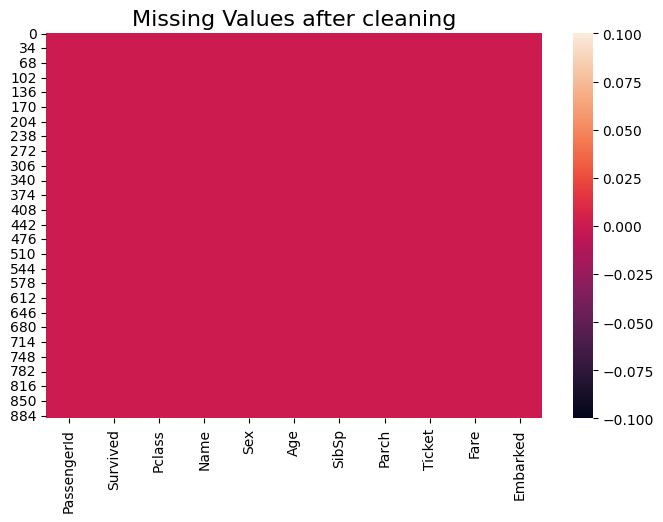

In [26]:

plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull())
plt.title('Missing Values after cleaning', fontsize=16)
plt.show()


## Add new column (Family Size)

In [27]:
df['FamilySize']=df['SibSp']+df['Parch']+1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Data Analysis and Visualization

In this section, we analyze the relationships between different features and the target variable (Survived) , Provided with observations. 

## count survived
**Based on different features.**

In [28]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

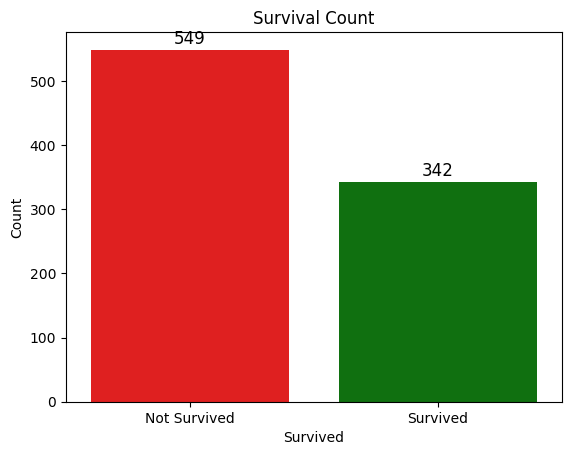

In [29]:

ax = sns.countplot(x='Survived', data=df, palette=['red', 'green'])

for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 10, 
             f'{int(p.get_height())}', ha='center', fontsize=12, color='black')

plt.title('Survival Count')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)

plt.show()


## Survived Vs sex

In [30]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

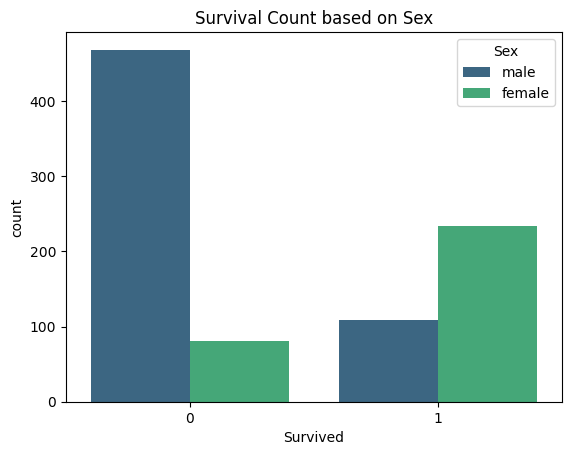

In [31]:
# survived based on sex
sns.countplot(x='Survived',data=df,hue='Sex',palette='viridis')
plt.title('Survival Count based on Sex')
plt.show()

**Females had a significantly higher survival rate compared to males.**

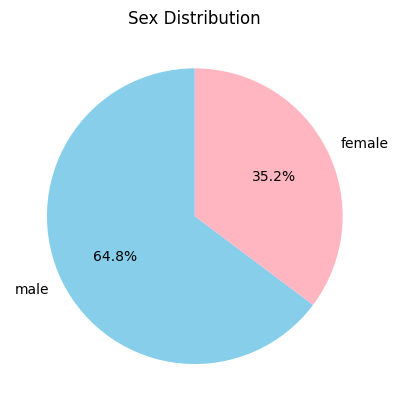

In [32]:
plt.pie(df['Sex'].value_counts(), 
        labels=df['Sex'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=['skyblue', 'lightpink'],
        startangle=90)

plt.title('Sex Distribution')
plt.show()


## Survived Vs Pclass

In [33]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

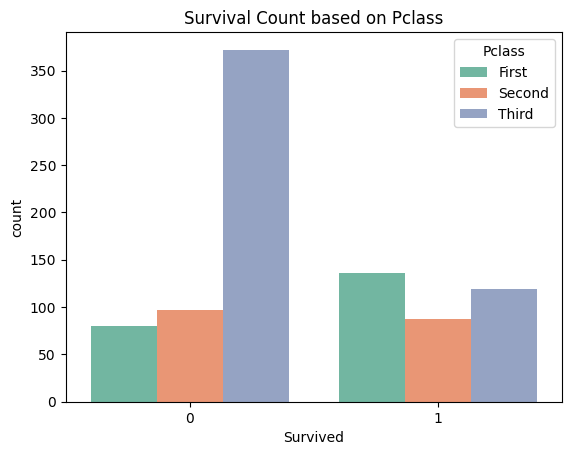

In [34]:
sns.countplot(x='Survived', data=df, hue='Pclass', palette='Set2')
plt.legend(title='Pclass', labels=['First', 'Second', 'Third'])
plt.title('Survival Count based on Pclass')
plt.show()


**Passengers from higher classes (especially First Class) had a greater chance of survival compared to those in lower classes.**

## Survived Vs Age

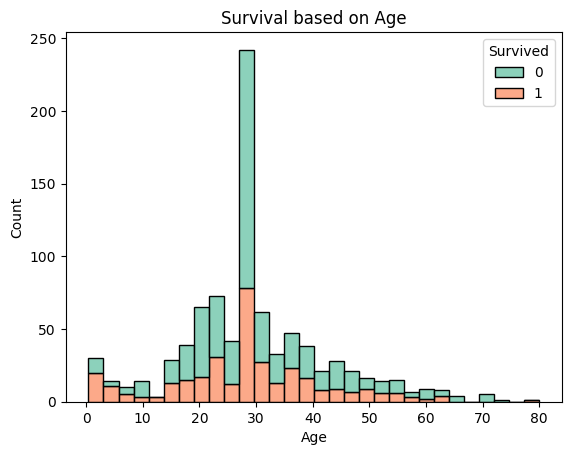

In [35]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='Set2')
plt.title('Survival based on Age')
plt.show()


**Younger passenger had a slightly better survival rate, but overall survival was spread across all age groups**

## Survived vs Fare

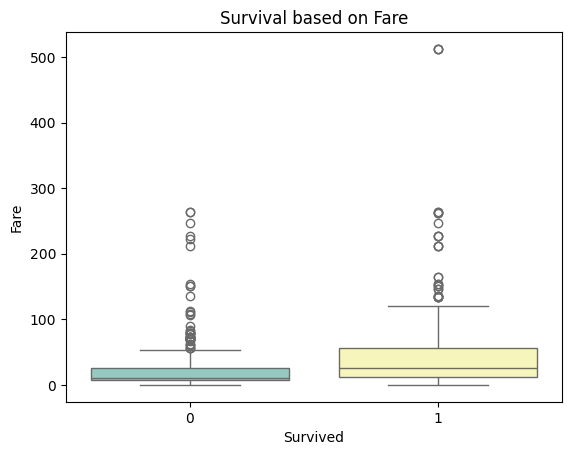

In [36]:
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set3')
plt.title('Survival based on Fare')
plt.show()


**Passengers who survived tended to have paid higher fares compared to those who did not survive, suggesting that individuals in higher classes (with more expensive tickets) had a better chance of survival**

## Survived vs Embarked

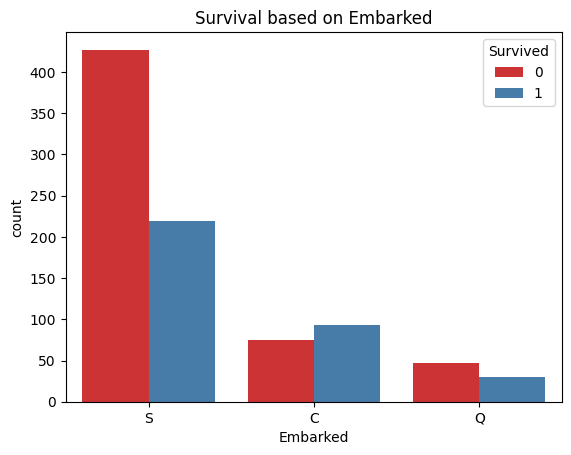

In [37]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival based on Embarked')
plt.show()


**Passengers who embarked from Southampton (S) had a higher survival rate compared to those from Cherbourg (C) or Queenstown (Q)**

## Survived Vs Familysize

In [38]:
df['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

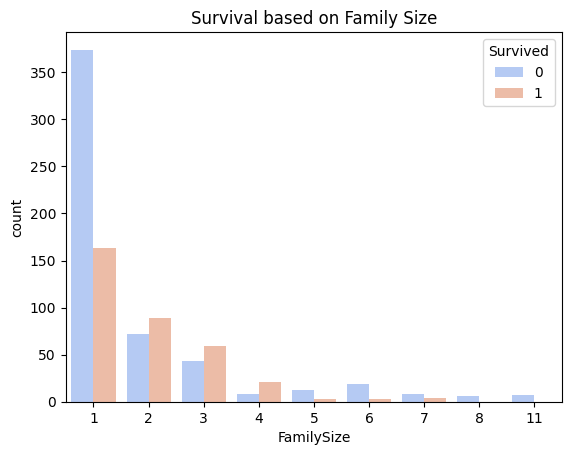

In [39]:

sns.countplot(x='FamilySize', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival based on Family Size')
plt.show()


**Passengers traveling alone had a lower survival rate compared to those traveling with small families (2–4 members)**

## Correlation Map

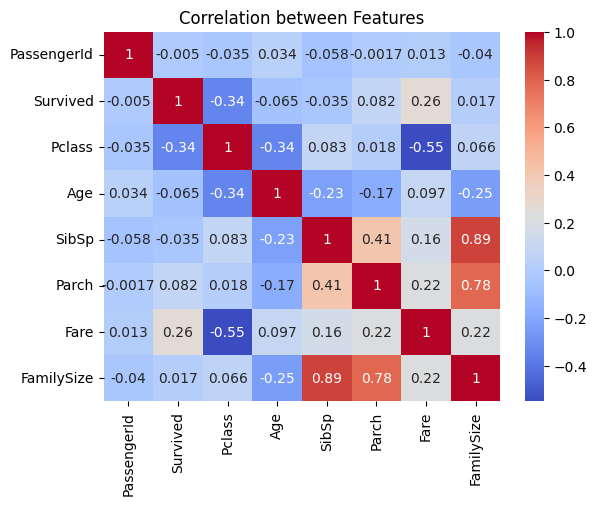

In [40]:
df_cor=df.select_dtypes(np.number)
corr=df_cor.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


**No strong correlations were found between most numerical features, except for a moderate negative correlation between Pclass and Fare. Survival showed weak to moderate correlations with features like Fare and Pclass.**